In [78]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [52]:
genus = ['Helicobacter',
 'Pseudomonas',
 'Acinetobacter',
 'Neisseria',
 'Escherichia',
 'Phocaeicola',
 'Cereibacter',
 'Staphylococcus',
 'Staphylococcus',
 'Deinococcus',
 'Streptococcus',
 'Streptococcus',
 'Streptococcus',
 'Enterococcus',
 'Bacillus',
 'Clostridium',
 'Lactobacillus',
 'Listeria',
 'Schaalia',
 'Cutibacterium']
species = ['pylori',
 'aeruginosa',
 'baumannii',
 'meningitidis',
 'coli',
 'vulgatus',
 'sphaeroides',
 'aureus',
 'epidermidis',
 'radiodurans',
 'mutans',
 'agalactiae',
 'pneumoniae',
 'faecalis',
 'cereus',
 'beijerinckii',
 'gasseri',
 'monocytogenes',
 'odontolytica',
 'acnes']
taxid = [210,
 287,
 470,
 487,
 562,
 821,
 1063,
 1280,
 1282,
 1299,
 1309,
 1311,
 1313,
 1351,
 1396,
 1520,
 1596,
 1639,
 1660,
 1747]

In [128]:
combined_df = pd.DataFrame({'genus': genus, 'species': species, 'taxid': taxid})

search_dir = '../../analysis/snipen_2021/'
rep_names = ['SRR10199716', 'SRR10199724', 'SRR10199725']

for i in os.listdir(search_dir):
    if i.startswith('kraken'):
        if i.endswith('real'):
            for j in rep_names:
                target_dir = os.path.join(search_dir, i, '1_kraken_bracken_bei', j)
                for k in os.listdir(target_dir):
                    if k.endswith('bracken'):
                        df = pd.read_csv(os.path.join(target_dir,k), sep='\s+')
                        df.sort_values(by=['taxonomy_id'], inplace=True)
                        new_col = str(i+'_'+j)[15:]
#                         combined_df[new_col] = df['fraction_total_reads'].to_list()
                        combined_df[new_col] = df['kraken_assigned_reads'].to_list()

        else:
            for j in rep_names:
                target_dir = os.path.join(search_dir, i, '1_kraken_bracken_bei', j+'_sim')
                for k in os.listdir(target_dir):
                    if k.endswith('bracken'):
                        df = pd.read_csv(os.path.join(target_dir,k), sep='\s+')
                        df.sort_values(by=['taxonomy_id'], inplace=True)
                        new_col = str(i+'_'+j)[15:]
#                         combined_df[new_col] = df['fraction_total_reads'].to_list()
                        combined_df[new_col] = df['kraken_assigned_reads'].to_list()


        

In [129]:
combined_df

,genus,species,taxid,sim_SRR10199716,sim_SRR10199724,sim_SRR10199725,sim_100_c_SRR10199716,sim_100_c_SRR10199724,sim_100_c_SRR10199725,real_SRR10199716,...,real_SRR10199725,sim_100_u_SRR10199716,sim_100_u_SRR10199724,sim_100_u_SRR10199725,sim_mean_sd_SRR10199716,sim_mean_sd_SRR10199724,sim_mean_sd_SRR10199725,sim_80_c_SRR10199716,sim_80_c_SRR10199724,sim_80_c_SRR10199725
0,Helicobacter,pylori,210,27600,66933,33640,27736,67823,33284,24697,...,31012,23655,57410,28414,28018,68105,33597,29643,72749,35545
1,Pseudomonas,aeruginosa,287,8282,21632,10166,7461,18083,8853,11662,...,16109,11628,29050,14065,7167,17795,8634,6116,14884,7309
2,Acinetobacter,baumannii,470,39805,94968,47283,37979,92862,45388,34107,...,43728,34842,85218,42234,38265,92861,45975,39389,95967,47023
3,Neisseria,meningitidis,487,19529,49301,23596,17833,43268,21217,21934,...,27650,24651,60903,29655,17390,42842,20853,15868,38612,18936
4,Escherichia,coli,562,31854,79567,38129,30106,73362,36009,34939,...,42090,37022,90843,44176,29710,72994,35377,27759,67580,32956
5,Phocaeicola,vulgatus,821,73210,185681,88428,66939,163057,80033,94080,...,118335,90158,221969,107679,65812,161865,78432,60264,146524,71522
6,Cereibacter,sphaeroides,1063,8020,20537,9824,7835,19054,9356,4436,...,5946,11814,29564,14313,7561,18805,9135,6491,15820,7771
7,Staphylococcus,aureus,1280,36936,86840,44221,36007,88225,43446,35631,...,45514,27099,65509,32570,37154,89383,44102,40444,99799,49420
8,Staphylococcus,epidermidis,1282,38194,88760,45084,36921,90512,44547,27085,...,33852,29415,71178,35366,38177,91767,45240,41629,102667,50827
9,Deinococcus,radiodurans,1299,11305,29406,13901,9863,23951,11772,8266,...,10167,15637,39124,18930,9452,23592,11450,7897,19221,9448


In [130]:
nameless_df = combined_df.drop(['genus', 'species', 'taxid'], axis=1)
label_names = [i + ' ' + j for i, j in zip(genus, species)]
nameless_df.index = label_names

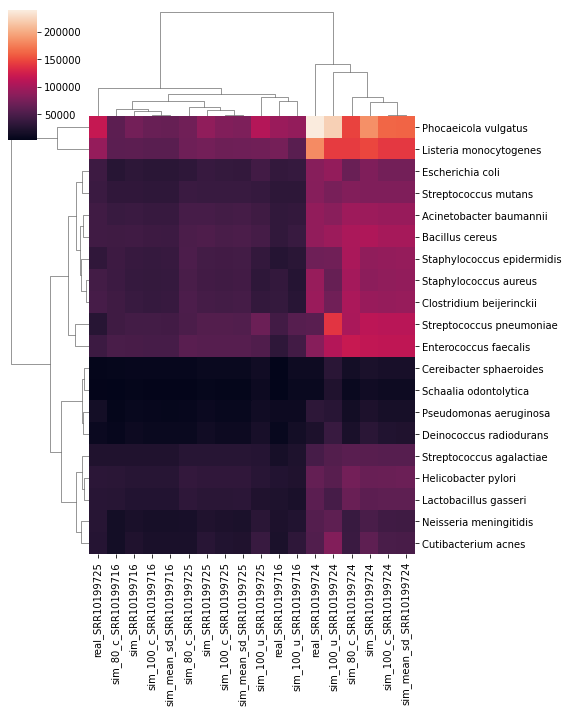

In [131]:
sns.clustermap(nameless_df,figsize=(8, 10))
plt.show()

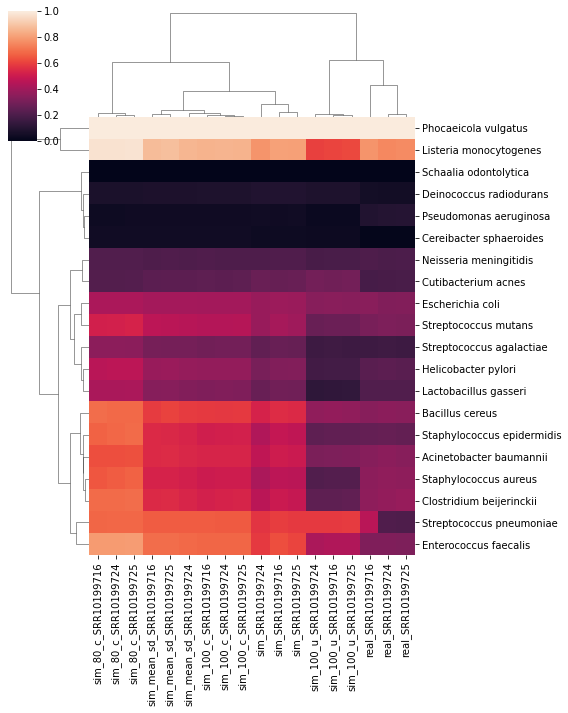

In [132]:
sns.clustermap(nameless_df,figsize=(8, 10),standard_scale=1)
plt.show()